In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### First type of plot

In [37]:
def PearsonPlot(df, genus):
    
    plt.figure(figsize=(20,8))

    if genus:
        classificators = ['centrifuge','clark_genus','kraken1','kraken2']
    else:
        classificators = ['centrifuge','clark_species','kraken1','kraken2']


    colors = ['green','yellow','red','blue']
        
    dfs = {}
    count = 0
    for name in(classificators):
        new_df = df[df["Classifier"].str.contains(name)]
        dfs[name] = new_df
        x = []
        for t in(dfs[name]['Classifier']):
            if 'SPZ' in t:
                x.append('Single - partial - zero')
            elif 'SP' in t:
                x.append('Single - partial')
            elif 'STZ' in t:
                x.append('Single - total - zero')
            elif 'ST' in t:
                x.append('Single - total')
            else:
                x.append('Original')
        y = dfs[name]['pearson']
        
        plt.plot(x, y, color=colors[count], marker='o', linestyle='dashed',linewidth=2, markersize=15, label=name)

        count += 1

  #  plt.ylim(0,1.05)
   # plt.yticks(np.arange(0,1.05,0.05))
    plt.grid(True)
    plt.legend(loc='lower right')
    #plt.xticks(rotation=45)


    plt.xlabel('Version of the classifier',fontsize=14)
    plt.ylabel('Pearson [0.0 - 1.0]',fontsize=14)
    
    plt.title('Pearson values',fontweight='bold',fontsize=20)

### Second type

In [54]:
def PearsonPlot2(df, name):
    
    plt.figure(figsize=(20,8))

  #  colors = ['green','yellow','red','blue']
        
    new_df = df[df["Classifier"].str.contains(name)] 
    new_df2 =(df[df["Classifier"].str.contains('M')])
    new_df = new_df.append(new_df2)    
    df = new_df.reset_index()
    x = []
    y = []
    x1 = ''
    y1 = 0
    for t in(df['Classifier']):
        if 'MP' in t:
            x.append(t)
            df_new = df[df["Classifier"].str.contains(t)]
            y.append(df_new['pearson'].values)
        elif 'SP' in t:
            x.append(t)
            df_new = df[df["Classifier"].str.contains(t)]
            y.append(df_new['pearson'].values)
        elif 'MT' in t:
            x.append(t)
            df_new = df[df["Classifier"].str.contains(t)]
            y.append(df_new['pearson'].values)
        elif 'ST' in t:
            x.append(t)
            df_new = df[df["Classifier"].str.contains(t)]
            y.append(df_new['pearson'].values)
        else:
            x1 = t
            df_new = df[df["Classifier"].str.contains(t)]
            y1 = df_new['pearson'].values

    y1 = [y1[0]]* (len(df)-1)

    plt.plot(x, y, color='#739aff', marker='o', linestyle='dashed',linewidth=2, markersize=15, label=name+'Reclassified')
    
    plt.plot(x, y1, color='#1bc200',linewidth=3, markersize=15, label=name)


    
   # plt.ylim(0,1.05)
  #  plt.yticks(np.arange(0,1.05,0.05))
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.xticks(rotation=45)


    plt.xlabel('Version of the classifier',fontsize=14)
    plt.ylabel('Pearson [0.0 - 1.0]',fontsize=14)
    plt.tight_layout() 
  #  plt.title('Pearson values',fontweight='bold',fontsize=20)
    plt.savefig('pearson-genus')



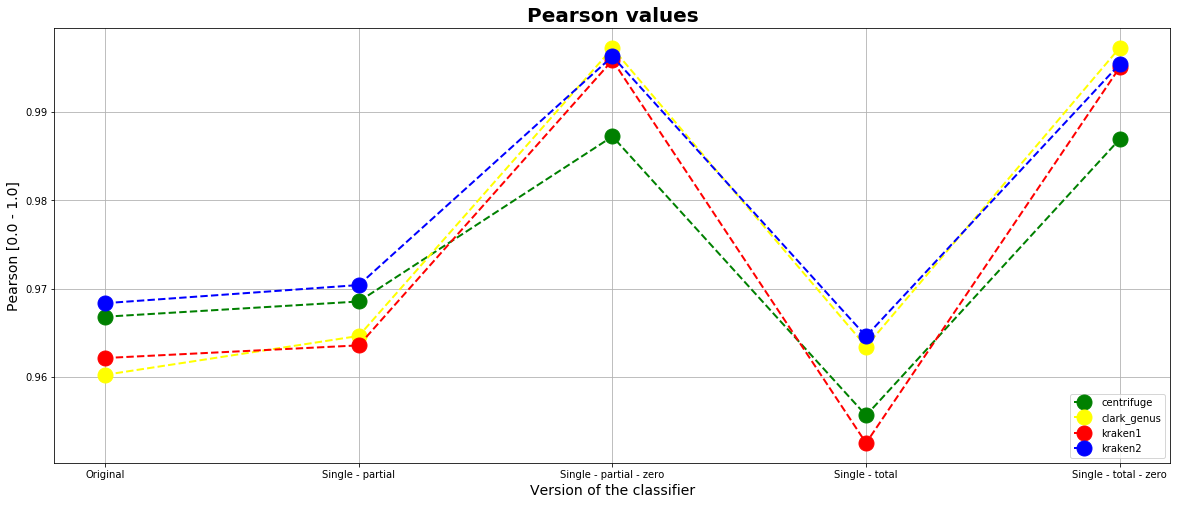

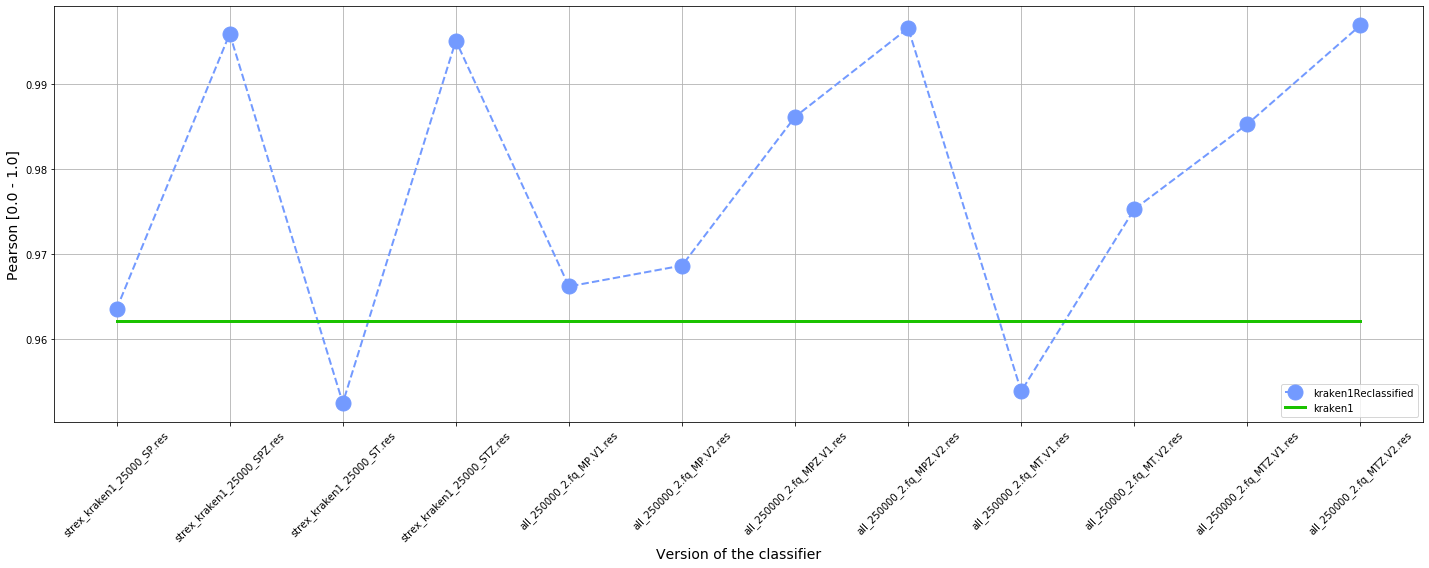

In [55]:
filename = 'results_evaluation_genus_40_40.csv'

df = pd.read_csv('../ResultsEvaluation/all_250000/'+filename, sep='\t')

PearsonPlot(df,True)
PearsonPlot2(df,'kraken1')

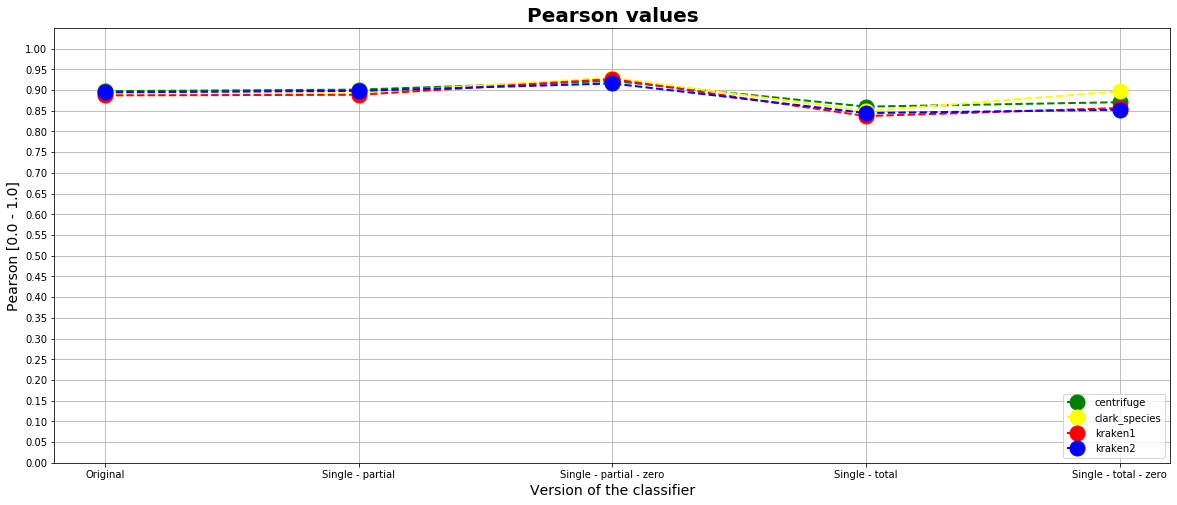

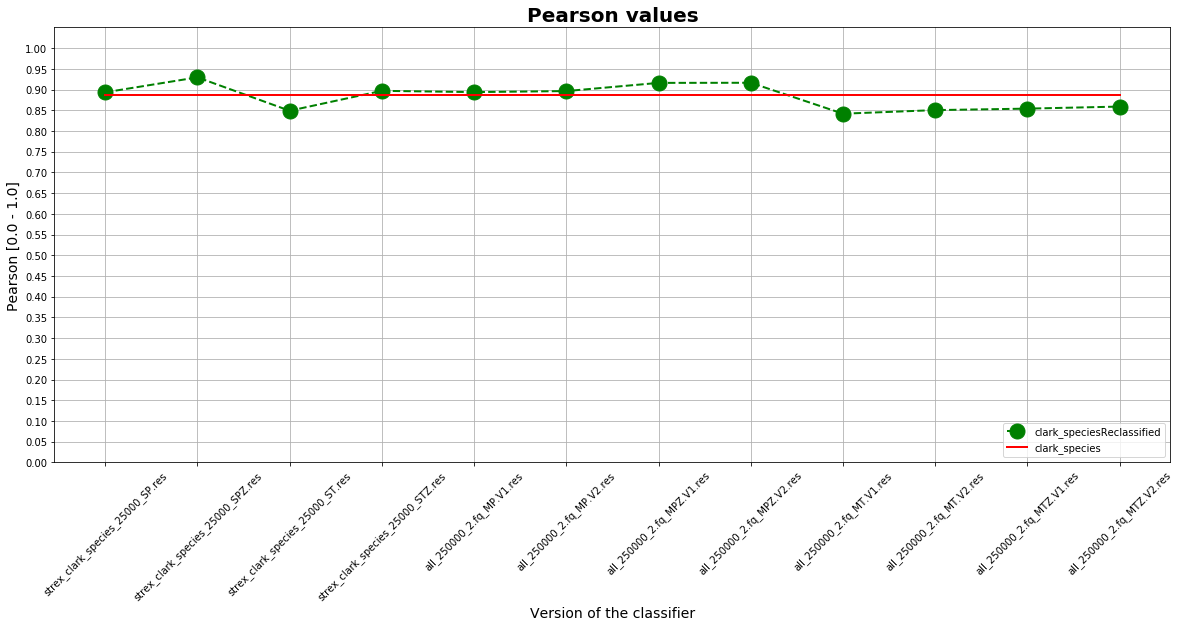

In [6]:
filename = 'results_evaluation_species_40_paired.csv'
#filename = 'results_evaluation_species_25.csv'

df = pd.read_csv('../ResultsEvaluation/'+filename, sep='\t')
PearsonPlot(df,False)
PearsonPlot2(df,'clark_species')